In [62]:
import pandas as pd
import numpy as np
df = pd.read_csv('./data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [12]:
columns_test = df.isnull().any()
columns_test_df = pd.DataFrame({'column name': columns_test.index, 'Is_Null': columns_test.values})
columns_null = columns_test_df[columns_test_df['Is_Null'] == True]
print("There are {} columns containing NULL or NAN, or missing data.".format(len(columns_null)))

There are 9 columns containing NULL or NAN, or missing data.


In [13]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [14]:
mean_budget = int(df['budget'].mean())
mean_revenue = int(df['revenue'].mean())

In [15]:
df_copy = df
df_copy = df_copy.drop(['popularity','cast','homepage','keywords','imdb_id','overview','tagline','budget_adj','revenue_adj'], axis=1)
df_copy.head()

,id,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [16]:
df_copy['director'] = df_copy['director'].fillna('unspecified')
df_copy['production_companies'] = df_copy['production_companies'].fillna('unspecified')
df_copy['genres'] = df_copy['genres'].fillna('unspecified')

In [17]:
df_copy.query('director=="unspecified"').head(10)
df_copy.query('production_companies=="unspecified"').head(10)
df_copy.query('genres == "unspecified"').head(10)

,id,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
424,363869,0,0,Belli di papÃ,Guido Chiesa,100,unspecified,unspecified,2015-10-29,21,6.1,2015
620,361043,0,0,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,unspecified,Ruthless Pictures|Hollywood Shorts,2015-10-06,13,5.0,2015
997,287663,0,0,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,44,unspecified,unspecified,2014-10-03,13,6.8,2014
1712,21634,0,0,Prayers for Bobby,Russell Mulcahy,88,unspecified,Daniel Sladek Entertainment,2009-02-27,57,7.4,2009
1897,40534,0,0,Jonas Brothers: The Concert Experience,Bruce Hendricks,76,unspecified,unspecified,2009-02-27,11,7.0,2009
2370,127717,0,0,Freshman Father,Michael Scott,0,unspecified,unspecified,2010-06-05,12,5.8,2010
2376,315620,0,0,Doctor Who: A Christmas Carol,unspecified,62,unspecified,unspecified,2010-12-25,11,7.7,2010
2853,57892,0,0,Vizontele,YÄ±lmaz ErdoÄŸan,110,unspecified,unspecified,2001-02-02,12,7.2,2001
3279,54330,0,0,ì•„ê¸°ì™€ ë‚˜,Kim Jin-Yeong,96,unspecified,unspecified,2008-08-13,11,6.1,2008
4547,123024,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Danny Boyle,220,unspecified,BBC,2012-07-27,12,8.3,2012


In [18]:
df_copy['production_companies'] = df_copy['production_companies'].apply(lambda st: st.split('|')[0])

In [19]:

df_copy['budget'] = df_copy['budget'].replace(0,mean_budget)
df_copy['revenue'] = df_copy['revenue'].replace(0,mean_revenue)

In [20]:

genre_list = list(map(str, (df_copy['genres'])))
genre_set = []
for j in genre_list:
    # split the genres to get indiviual genres.
    genre_splitting = list(map(str, j.split('|')))
    for jj in genre_splitting:
        if jj not in genre_set:
            genre_set.append(jj)
            
print(genre_set)

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'unspecified', 'Foreign']


In [21]:
max_year, min_year = df_copy['release_year'].max(), df_copy['release_year'].min()
print("The most recent year in this dataset:{} and earliest year:{}".format(max_year, min_year))

The most recent year in this dataset:2015 and earliest year:1960


In [22]:

# dataframe for genre counts 
genre_dataframe = pd.DataFrame(index=genre_set, columns=range(min_year, max_year + 1))

#populate the cells with zeros for now.
genre_dataframe = genre_dataframe.fillna(value = 0)
genre_dataframe.head(4)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Science Fiction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Thriller,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
year_re = np.array(df_copy['release_year'])
z_count = 0
for i in genre_list:
    split_genre = list(map(str,i.split('|')))
    for j in split_genre:
        genre_dataframe.loc[j, year_re[z_count]] = genre_dataframe.loc[j, year_re[z_count]] + 1
    z_count+=1
genre_dataframe.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,8,7,8,4,5,9,14,7,6,10,...,80,95,99,108,108,115,99,121,129,107
Adventure,5,6,7,7,5,6,11,7,5,5,...,55,60,63,72,59,62,50,67,67,69
Science Fiction,3,4,2,2,4,2,6,4,4,3,...,30,41,52,71,46,56,54,61,62,86
Thriller,6,0,7,10,9,11,8,5,5,3,...,114,125,127,157,135,146,160,175,179,171
Fantasy,2,2,1,2,4,0,2,3,5,2,...,34,47,43,49,44,46,34,39,36,33


In [24]:
genre_dataframe['sum_genre'] = genre_dataframe.values[:,:].sum(1)
genre_dataframe.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,sum_genre
Action,8,7,8,4,5,9,14,7,6,10,...,95,99,108,108,115,99,121,129,107,2385
Adventure,5,6,7,7,5,6,11,7,5,5,...,60,63,72,59,62,50,67,67,69,1471
Science Fiction,3,4,2,2,4,2,6,4,4,3,...,41,52,71,46,56,54,61,62,86,1230
Thriller,6,0,7,10,9,11,8,5,5,3,...,125,127,157,135,146,160,175,179,171,2908
Fantasy,2,2,1,2,4,0,2,3,5,2,...,47,43,49,44,46,34,39,36,33,916


In [25]:
tot_sum_arr = genre_dataframe['sum_genre'].values
total_sum = sum(tot_sum_arr)

indvid_percent = [tot_sum_arr[x]/total_sum for x in range(len(tot_sum_arr))]

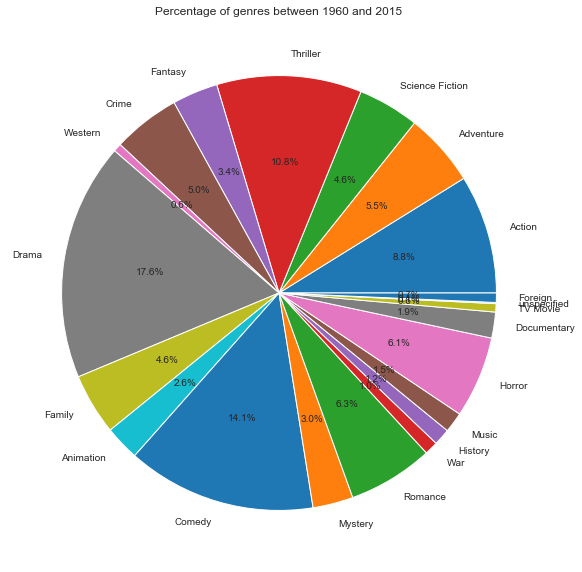

In [26]:
plt.figure(figsize=(10,10))
plt.pie(indvid_percent, labels = genre_set, autopct = '%1.1f%%', startangle =0)
plt.title("Percentage of genres between 1960 and 2015")
plt.show()

In [27]:
sorted_sum_values = genre_dataframe.sort_values(by=['sum_genre'], ascending = False)
print("Here are the top five most popular genres in terms of number of movies.\n")
sorted_sum_values.head()

Here are the top five most popular genres in terms of number of movies.



,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,sum_genre
Drama,13,16,21,13,20,20,16,16,20,13,...,197,233,224,211,214,232,253,284,260,4761
Comedy,8,10,5,13,16,7,16,17,9,12,...,151,169,198,169,172,176,175,185,162,3793
Thriller,6,0,7,10,9,11,8,5,5,3,...,125,127,157,135,146,160,175,179,171,2908
Action,8,7,8,4,5,9,14,7,6,10,...,95,99,108,108,115,99,121,129,107,2385
Romance,6,7,5,8,9,5,6,11,6,4,...,74,84,83,85,75,79,65,84,57,1712


In [28]:
df_animation = genre_dataframe.loc['Animation']
df_war = genre_dataframe.loc['War']
df_western = genre_dataframe.loc['Western']

max_western = int(df_western[:56].max())
max_war = int(df_war[:56].max())
max_animation = int(df_animation[:56].max())

print("Maximum number of western movies for a year:{}\n".format(max_western))
print("Maximum number of war movies for a year:{}\n".format(max_war))
print("Maximum number of animation movies for a year:{}\n".format(max_animation))
#print(df_crime[:56])

Maximum number of western movies for a year:8

Maximum number of war movies for a year:23

Maximum number of animation movies for a year:50



No handles with labels found to put in legend.


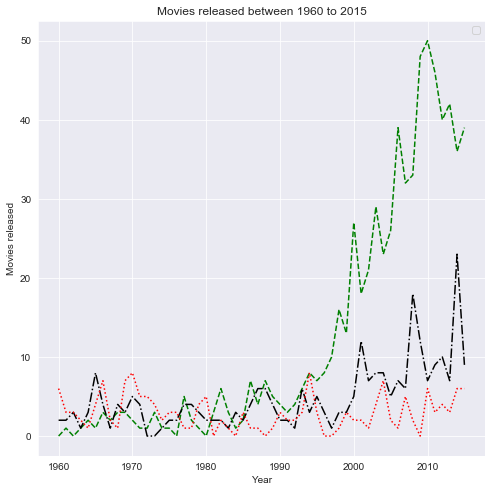

In [29]:
plt.figure(figsize=(8,8))
plt.plot(df_animation[:56], linewidth=1.5, linestyle='dashed', color='green')
plt.plot(df_war[:56], linewidth=1.5, linestyle='-.', color='black')
plt.plot(df_western[:56], linewidth=1.5, linestyle=':', color='red')
plt.xlabel('Year')
plt.ylabel("Movies released")
plt.title("Movies released between 1960 to 2015")
plt.legend(loc='best')
plt.show()

In [30]:
a_test = df_copy.groupby('production_companies')['revenue'].sum()
a_test_sorted = a_test.sort_values(ascending=False)
a_test_sorted.head(10)

production_companies
Universal Pictures                        45071805063
Paramount Pictures                        43825267373
unspecified                               37675813205
Walt Disney Pictures                      35876900795
Columbia Pictures                         31981146369
Twentieth Century Fox Film Corporation    25727374114
New Line Cinema                           16239565556
Warner Bros.                              13230106460
Village Roadshow Pictures                 12489346393
DreamWorks SKG                            11227838411
Name: revenue, dtype: int64

In [31]:
a_test_sorted.tail(10)

production_companies
Gordon Bijelonic / Datari Turner Films    3003
Bloody Disgusting                         2756
KODA Entertainment                        1938
TrollhÃ¤ttan Film AB                       704
Sahara One Motion Pictures                 134
Picture Machine                            125
Pathe Productions                           23
chateau productions                         11
Filmhuset Gruppen                           11
Tales From The Crypt Holdings                5
Name: revenue, dtype: int64

In [32]:
df_universal_copy = df_copy.query('production_companies == "Universal Pictures"')
df_paramount_copy = df_copy.query('production_companies == "Paramount Pictures"')
df_disney_copy = df_copy.query('production_companies == "Walt Disney Pictures"')
df_columbia_copy = df_copy.query('production_companies == "Columbia Pictures"')

In [33]:
df_universal_groupby = df_universal_copy.groupby('release_year')['revenue'].sum()
df_paramount_groupby = df_paramount_copy.groupby('release_year')['revenue'].sum()
df_disney_groupby = df_disney_copy.groupby('release_year')['revenue'].sum()
df_columbia_groupby = df_columbia_copy.groupby('release_year')['revenue'].sum()

In [34]:

df_universal_groupby = df_universal_copy.groupby('release_year')['revenue'].sum()
df_paramount_groupby = df_paramount_copy.groupby('release_year')['revenue'].sum()
df_disney_groupby = df_disney_copy.groupby('release_year')['revenue'].sum()
df_columbia_groupby = df_columbia_copy.groupby('release_year')['revenue'].sum()

In [35]:

df_universal_groupby_df = pd.DataFrame(df_universal_groupby)
df_paramount_groupby_df = pd.DataFrame(df_paramount_groupby)
df_disney_groupby_df = pd.DataFrame(df_disney_groupby)
df_columbia_groupby_df = pd.DataFrame(df_columbia_groupby)

In [36]:
df_universal_groupby_df['release_year'] = df_universal_groupby_df.index
df_paramount_groupby_df['release_year'] = df_paramount_groupby_df.index
df_disney_groupby_df['release_year'] = df_disney_groupby_df.index
df_columbia_groupby_df['release_year'] = df_columbia_groupby_df.index


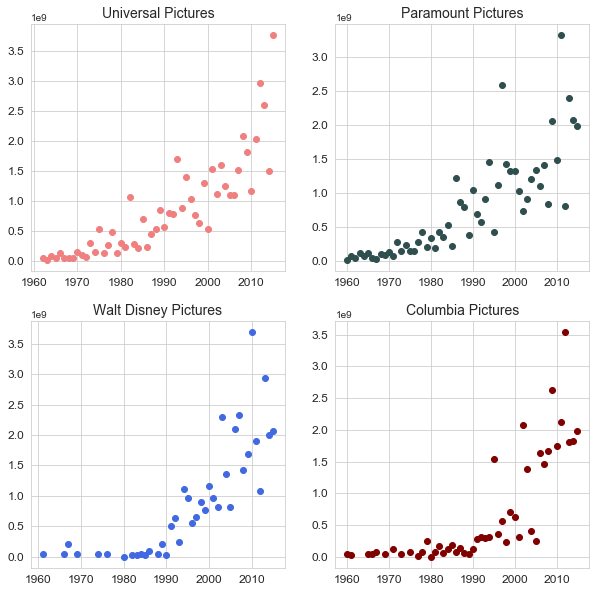

In [102]:
fig_1 = plt.figure(figsize=(10,10))

ax_plot1 = fig_1.add_subplot(2,2,1)
ax_plot1.scatter(df_universal_groupby_df['release_year'], df_universal_groupby_df['revenue'], color='lightcoral')
ax_plot1.set_title("Universal Pictures", size=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax_plot2 = fig_1.add_subplot(2,2,2)
ax_plot2.scatter(df_paramount_groupby_df['release_year'], df_paramount_groupby_df['revenue'], color='darkslategrey')
ax_plot2.set_title("Paramount Pictures", size=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax_plot3 = fig_1.add_subplot(2,2,3)
ax_plot3.scatter(df_disney_groupby_df['release_year'], df_disney_groupby_df['revenue'], color='royalblue')
ax_plot3.set_title("Walt Disney Pictures", size=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax_plot4 = fig_1.add_subplot(2,2,4)
ax_plot4.scatter(df_columbia_groupby_df['release_year'], df_columbia_groupby_df['revenue'], color='maroon')
ax_plot4.set_title("Columbia Pictures", size=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# plt.ylabel("Combination of Condition1 and Condition2",fontsize=12)
# plt.xlabel("Average Sale Price",fontsize=12)
# plt.title("Proximity to various conditions effects the sales",fontsize=12)
plt.savefig("./images/ProductionCompanies.png")
plt.show()

In [99]:
df.query("runtime == 0").runtime.count()

31

In [41]:
df[df.duplicated(subset=["original_title","release_year"], keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,3.000000e+07,9.670000e+05
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,3.000000e+07,9.670000e+05
2508,11944,tt0178145,0.406308,20000000,0,Joan of Arc,Leelee Sobieski|Powers Boothe|Neil Patrick Har...,NaN,Christian Duguay,She died at 19. 500 years later her legend liv...,...,"Ten years before her death, Joan hears voices....",140,Drama|History,NaN,1999-05-16,13,5.8,1999,2.618106e+07,0.000000e+00
2571,10047,tt0151137,0.235223,60000000,66976317,Joan of Arc,Milla Jovovich|Dustin Hoffman|Faye Dunaway|Joh...,NaN,Luc Besson,NaN,...,In 1429 a teenage girl from a remote French vi...,148,Adventure|Drama|Action|History|War,Columbia Pictures|Gaumont,1999-10-18,209,6.1,1999,7.854317e+07,8.767554e+07
5724,217316,tt2518788,0.364669,0,0,1,Michael Fassbender|Niki Lauda|Michael Schumach...,https://www.facebook.com/1thefilm,Paul Crowder,The True Story of the Drivers Who Risked Their...,...,Set in the golden era of Grand Prix Racing '1'...,112,Documentary,Exclusive Media Group|Universum Film (UFA)|Spi...,2013-09-30,25,7.6,2013,0.000000e+00,0.000000e+00
5748,176068,tt2395385,0.336081,0,0,1,Rhys Wakefield|Logan Miller|Ashley Hinshaw|Nat...,NaN,Dennis Iliadis,Everyone wants one.,...,Three college friends go to the biggest party ...,95,Thriller|Science Fiction,Process Productions,2013-09-20,49,5.1,2013,0.000000e+00,0.000000e+00
8550,3573,tt0116191,0.477489,6000000,22231658,Emma,Gwyneth Paltrow|Toni Collette|Alan Cumming|Ewa...,http://www.miramax.com/movie/emma/,Douglas McGrath,Cupid is armed and dangerous!,...,Emma Woodhouse is a congenial young lady who d...,121,Comedy|Drama|Romance,Miramax Films|Haft Entertainment|Matchmaker Films,1996-08-02,77,6.5,1996,8.341300e+06,3.090682e+07
8646,12254,tt0118308,0.161600,0,0,Emma,Kate Beckinsale|Bernard Hepton|Mark Strong|Sam...,NaN,Diarmuid Lawrence,NaN,...,Emma Woodhouse has a rigid sense of propriety ...,107,TV Movie|Comedy|Drama|Romance,Meridian Broadcasting Ltd,1996-08-01,15,6.6,1996,0.000000e+00,0.000000e+00


In [42]:
df.drop_duplicates(inplace=True)
# We know that there were 10866 records and only one duplicate record, so there should be 10865 records now.
df.shape

(10865, 21)

In [43]:
mean = int(df["runtime"].mean())
df["runtime"] = df["runtime"].apply(lambda x: mean if x == 0 else x)

In [68]:
df = df.loc[:,["runtime", "genres", "vote_average", "release_year"]]
df.head(3)

,runtime,genres,vote_average,release_year
0,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,119,Adventure|Science Fiction|Thriller,6.3,2015


In [110]:
# plot user rating histogram
def rating_hist(df1, df2, df3, lbl1, lbl2, lbl3, title):
    plt.figure(figsize=(8,6))
    plt.hist(df1.vote_average, bins=15, alpha=0.5, label=lbl1, color = "lightsalmon")
    plt.hist(df2.vote_average, bins=15, alpha=0.5, label=lbl2, color = "tomato")
    plt.hist(df3.vote_average, bins=15, alpha=0.5, label=lbl3, color = "maroon")
    plt.legend()
    plt.xlabel('User Rating',fontsize=14)
    plt.ylabel('Frequency',fontsize=14)
    plt.xticks(np.arange(10))

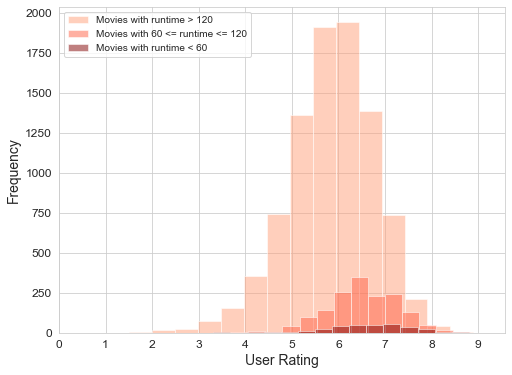

In [111]:
sns.set_style('whitegrid')
short = df.query("runtime < 60")
mid_len = df.query("60 <= runtime <= 120")
long = df.query("runtime > 120")

# plot them
rating_hist(
    mid_len,
    long,
    short,
    "Movies with runtime > 120",
    "Movies with 60 <= runtime <= 120",
    "Movies with runtime < 60",
    "User rating depending on the length of the movie"
)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("./images/UserRating.png")